# **1. Logistic Regression**

* [로지스틱회귀 쉽게 이해하기_그림O](https://hleecaster.com/ml-logistic-regression-concept/)

* [로지스틱 사용시 클래스가 3개 이상일때 전략](https://velog.io/@emseoyk/Hands-On-ML-with-Kaggle-3.-%EB%B6%84%EB%A5%98-Multiclass-Classification)

* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)
* 로지스틱 회귀(logistic regression)는 영국의 통계학자인 D.R.Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법
* LogisticRegression, SVM과 같은 알고리즘은 이진 분류만 가능(2개의 클래스 판별만 가능)
* 3개 이상의 클래스에 대한 판별을 진행하는 경우, 아래와 같은 전략으로 판별
  - one-vs-rest(OvR) : K개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별
  - one-vs-one(OvO) : 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, Ovs1, Ovs2, Ovs3, ... 2vs3까지 NX(N-1)/2개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

> 대부분 OvsR 전략을 선호

<ipython-input-1-764be65aa52e>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_iris.drop('target', 1), df_iris['target']
<ipython-input-1-764be65aa52e>:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target']


정답률 :  0.9736842105263158


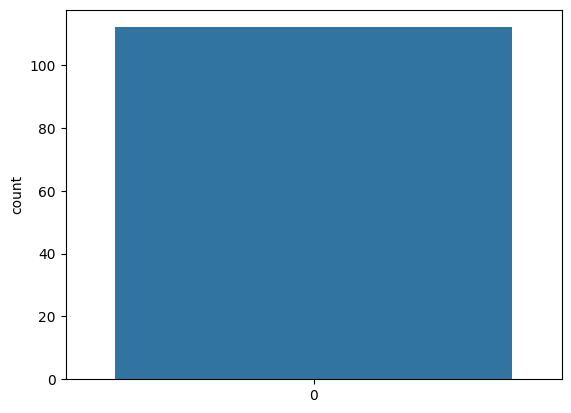

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

data = iris['data']

feature_names = iris['feature_names']

target = iris['target']

df_iris = pd.DataFrame(data, columns=feature_names)

df_iris['target'] = target

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    df_iris.drop('target', 1), df_iris['target']
)

import seaborn as sns
sns.countplot(y_train)

x_train, x_valid, y_train, y_valid = train_test_split(
    df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target']
)

sns.countplot(y_train)

from sklearn.svm import SVC # 분류
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_valid)
print('정답률 : ', accuracy_score(y_valid, y_pred))

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
# 모델 선언
model = LogisticRegression(random_state=0)

```
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
```

In [5]:
# 모델 학습
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [7]:
# 예측
prediction = model.predict(x_valid)

In [8]:
prediction[:5]

array([1, 2, 1, 1, 0])

In [9]:
# 평가
(prediction == y_valid).mean()

0.9736842105263158

# **2. SGDClassifier**

### **stochastic gradient descent(SGD) : 확률적 경사 하강법**
* [다큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [11]:
from IPython.display import Image

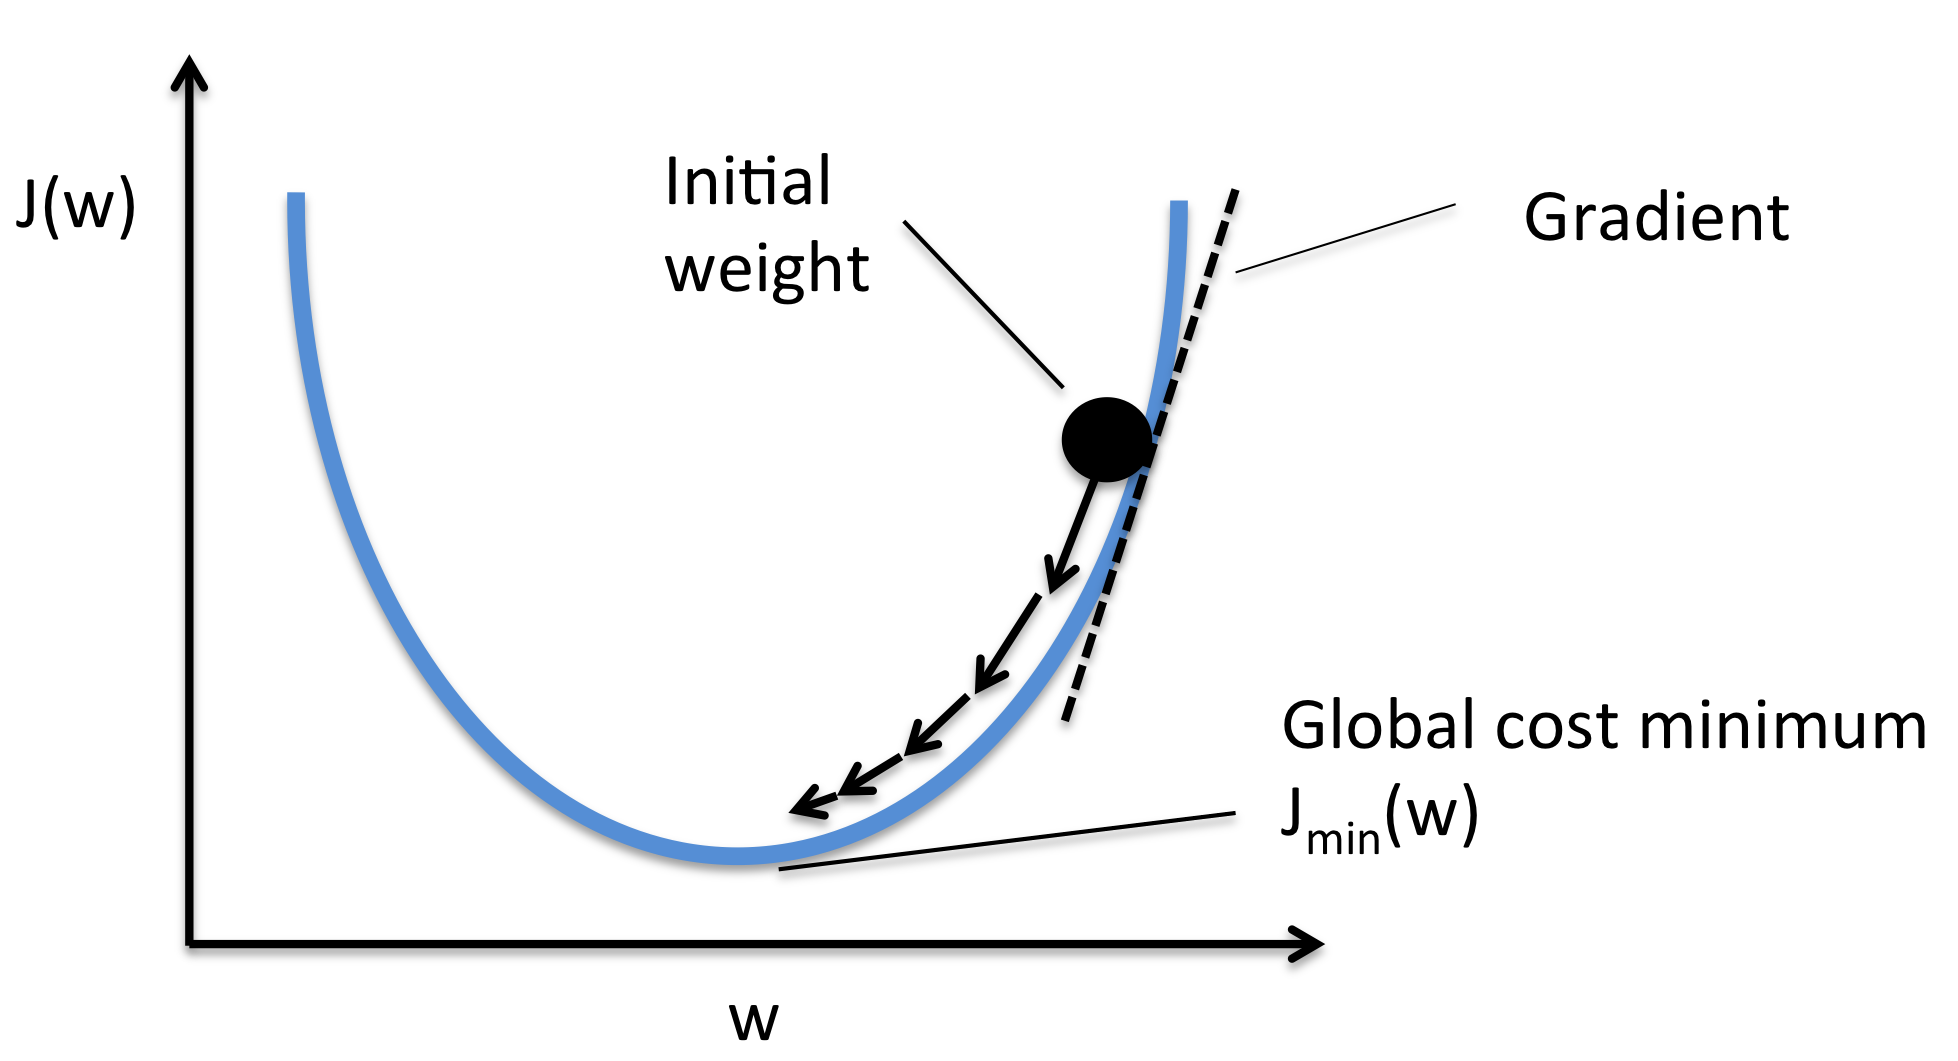

In [12]:
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=400)

In [13]:
from sklearn.linear_model import SGDClassifier

In [14]:
# 모델 선언
sgd = SGDClassifier(random_state=0)

In [15]:
# 모델 학습
sgd.fit(x_train, y_train)

SGDClassifier(random_state=0)

In [16]:
# 예측
prediction = sgd.predict(x_valid)

In [17]:
(prediction == y_valid).mean()

0.9473684210526315

# **3. 하이퍼 파라미터(hyper-parameter)**

* 알고리즘 별 매개변수
* 문서를 보고 적절한 가설을 세운 다음 적용하면서 검증
* random_state: 하이퍼 파라미터 튜닝시 고정
* n_jobs: CPU를 모두 사용(n_jobs=-1)

> 파라미터 vs 하이퍼파라미터

> 파라미터
 * 파라미터는 한국어로 매개변수입니다. 파라미터는 모델 내부에서 결정되는 변수입니다. 또한 그 값은 데이터로부터 결정됩니다. 무슨 말인지 예를 들어 설명해보겠습니다. 한 클래스에 속해 있는 학생들의 키에 대한 정규분포를 그린다고 합시다. 정규분포를 그리면 평균(μ)과 표준편차(σ) 값이 구해집니다. 여기서 평균과 표준편차는 파라미터(parameter)입니다. 파라미터는 데이터를 통해 구해지며 (They are estimated or learned from data), 모델 내부적으로 결정되는 값입니다. 사용자에 의해 조정되지 않습니다. (They are often not set manually by the practitioner)
 * 선형 회귀의 계수도 마찬가지입니다. 수많은 데이터가 있고, 그 데이터에 대해 선형 회귀를 했을 때 계수가 결정됩니다. 이 계수는 사용자가 직접 설정하는 것이 아니라 모델링에 의해 자동으로 결정되는 값입니다.


> 하이퍼파라미터
 * 하이퍼 파라미터는 모델링할 때 사용자가 직접 세팅해주는 값을 뜻합니다. (They are often specified by the practitioner) learning rate나 서포트 벡터 머신에서의 C, sigma 값, KNN에서의 K값 등등 굉장히 많습니다. 머신러닝 모델을 쓸 때 사용자가 직접 세팅해야 하는 값은 상당히 많습니다. 그 모든 게 다 하이퍼 파라미터입니다. 하지만, 많은 사람들이 그런 값들을 조정할 때 그냥 '모델의 파라미터를 조정한다'라는 표현을 씁니다. 원칙적으로는 '모델의 하이퍼 파라미터를 조정한다'라고 해야 합니다.
 * 하이퍼 파라미터는 정해진 최적의 값이 없습니다. 휴리스틱한 방법이나 경험 법칙(rules of thumb)에 의해 결정하는 경우가 많습니다. (They can often be set using heuristics) 베이지안 옵티미제이션과 같이 자동으로 하이퍼 파라미터를 선택해주는 라이브러리도 있긴 합니다.


# **4. KNeighborsClassifier**

* 최근접 이웃 알고리즘

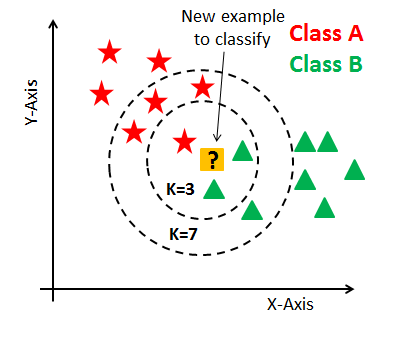

In [ ]:
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knc = KNeighborsClassifier()

In [21]:
# 학습
knc.fit(x_train, y_train)

KNeighborsClassifier()

```
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
```

In [22]:
# 예측
knc_pred = knc.predict(x_valid)

In [23]:
(knc_pred == y_valid).mean()

0.9736842105263158

# **5. SupportVectorClassification**

* 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦
* 경계로 표현하는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘
* LogisticRegression과 같이 이진 분류만 가능
* OvsR 전략 사용
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)


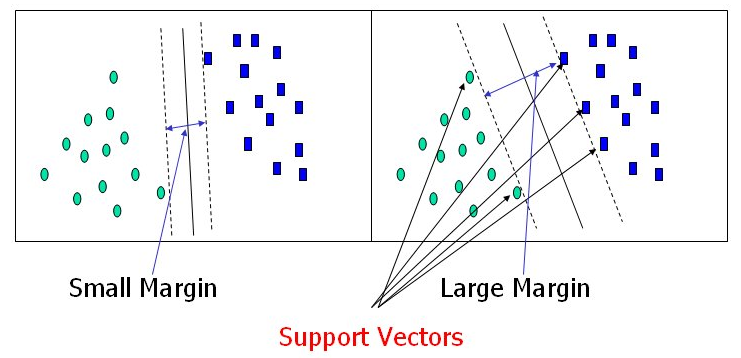

In [24]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC(random_state=0)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)

In [27]:
svc

SVC(random_state=0)

```
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)
```

In [28]:
(svc_pred == y_valid).mean()

0.9736842105263158

In [29]:
svc_pred[:5]

array([1, 2, 1, 1, 0])

In [30]:
svc.decision_function(x_valid)[:5]

array([[-0.22015307,  2.23504934,  0.8971274 ],
       [-0.23537418,  1.08073348,  2.22521945],
       [-0.2106352 ,  2.24079932,  0.84344649],
       [-0.22930321,  2.21901644,  1.07460026],
       [ 2.23082222,  1.16232226, -0.25398472]])

# **6.의사 결정 나무(Decision Tree)**

* 스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dtc = DecisionTreeClassifier(random_state=0)

In [35]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

```
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
```

In [36]:
dtc_pred = dtc.predict(x_valid)

In [37]:
(dtc_pred == y_valid).mean()

0.9736842105263158

In [38]:
from sklearn.tree import export_graphviz
from subprocess import call

In [40]:
def graph_tree(model):
  export_graphviz(model, out_file='tree.dot')

  call(['dot', '-Tpng', 'tree.dot', '-o', 'decision-tree.png', '-Gdpi=600'])

  return Image(filename='decision-tree.png', width=500)

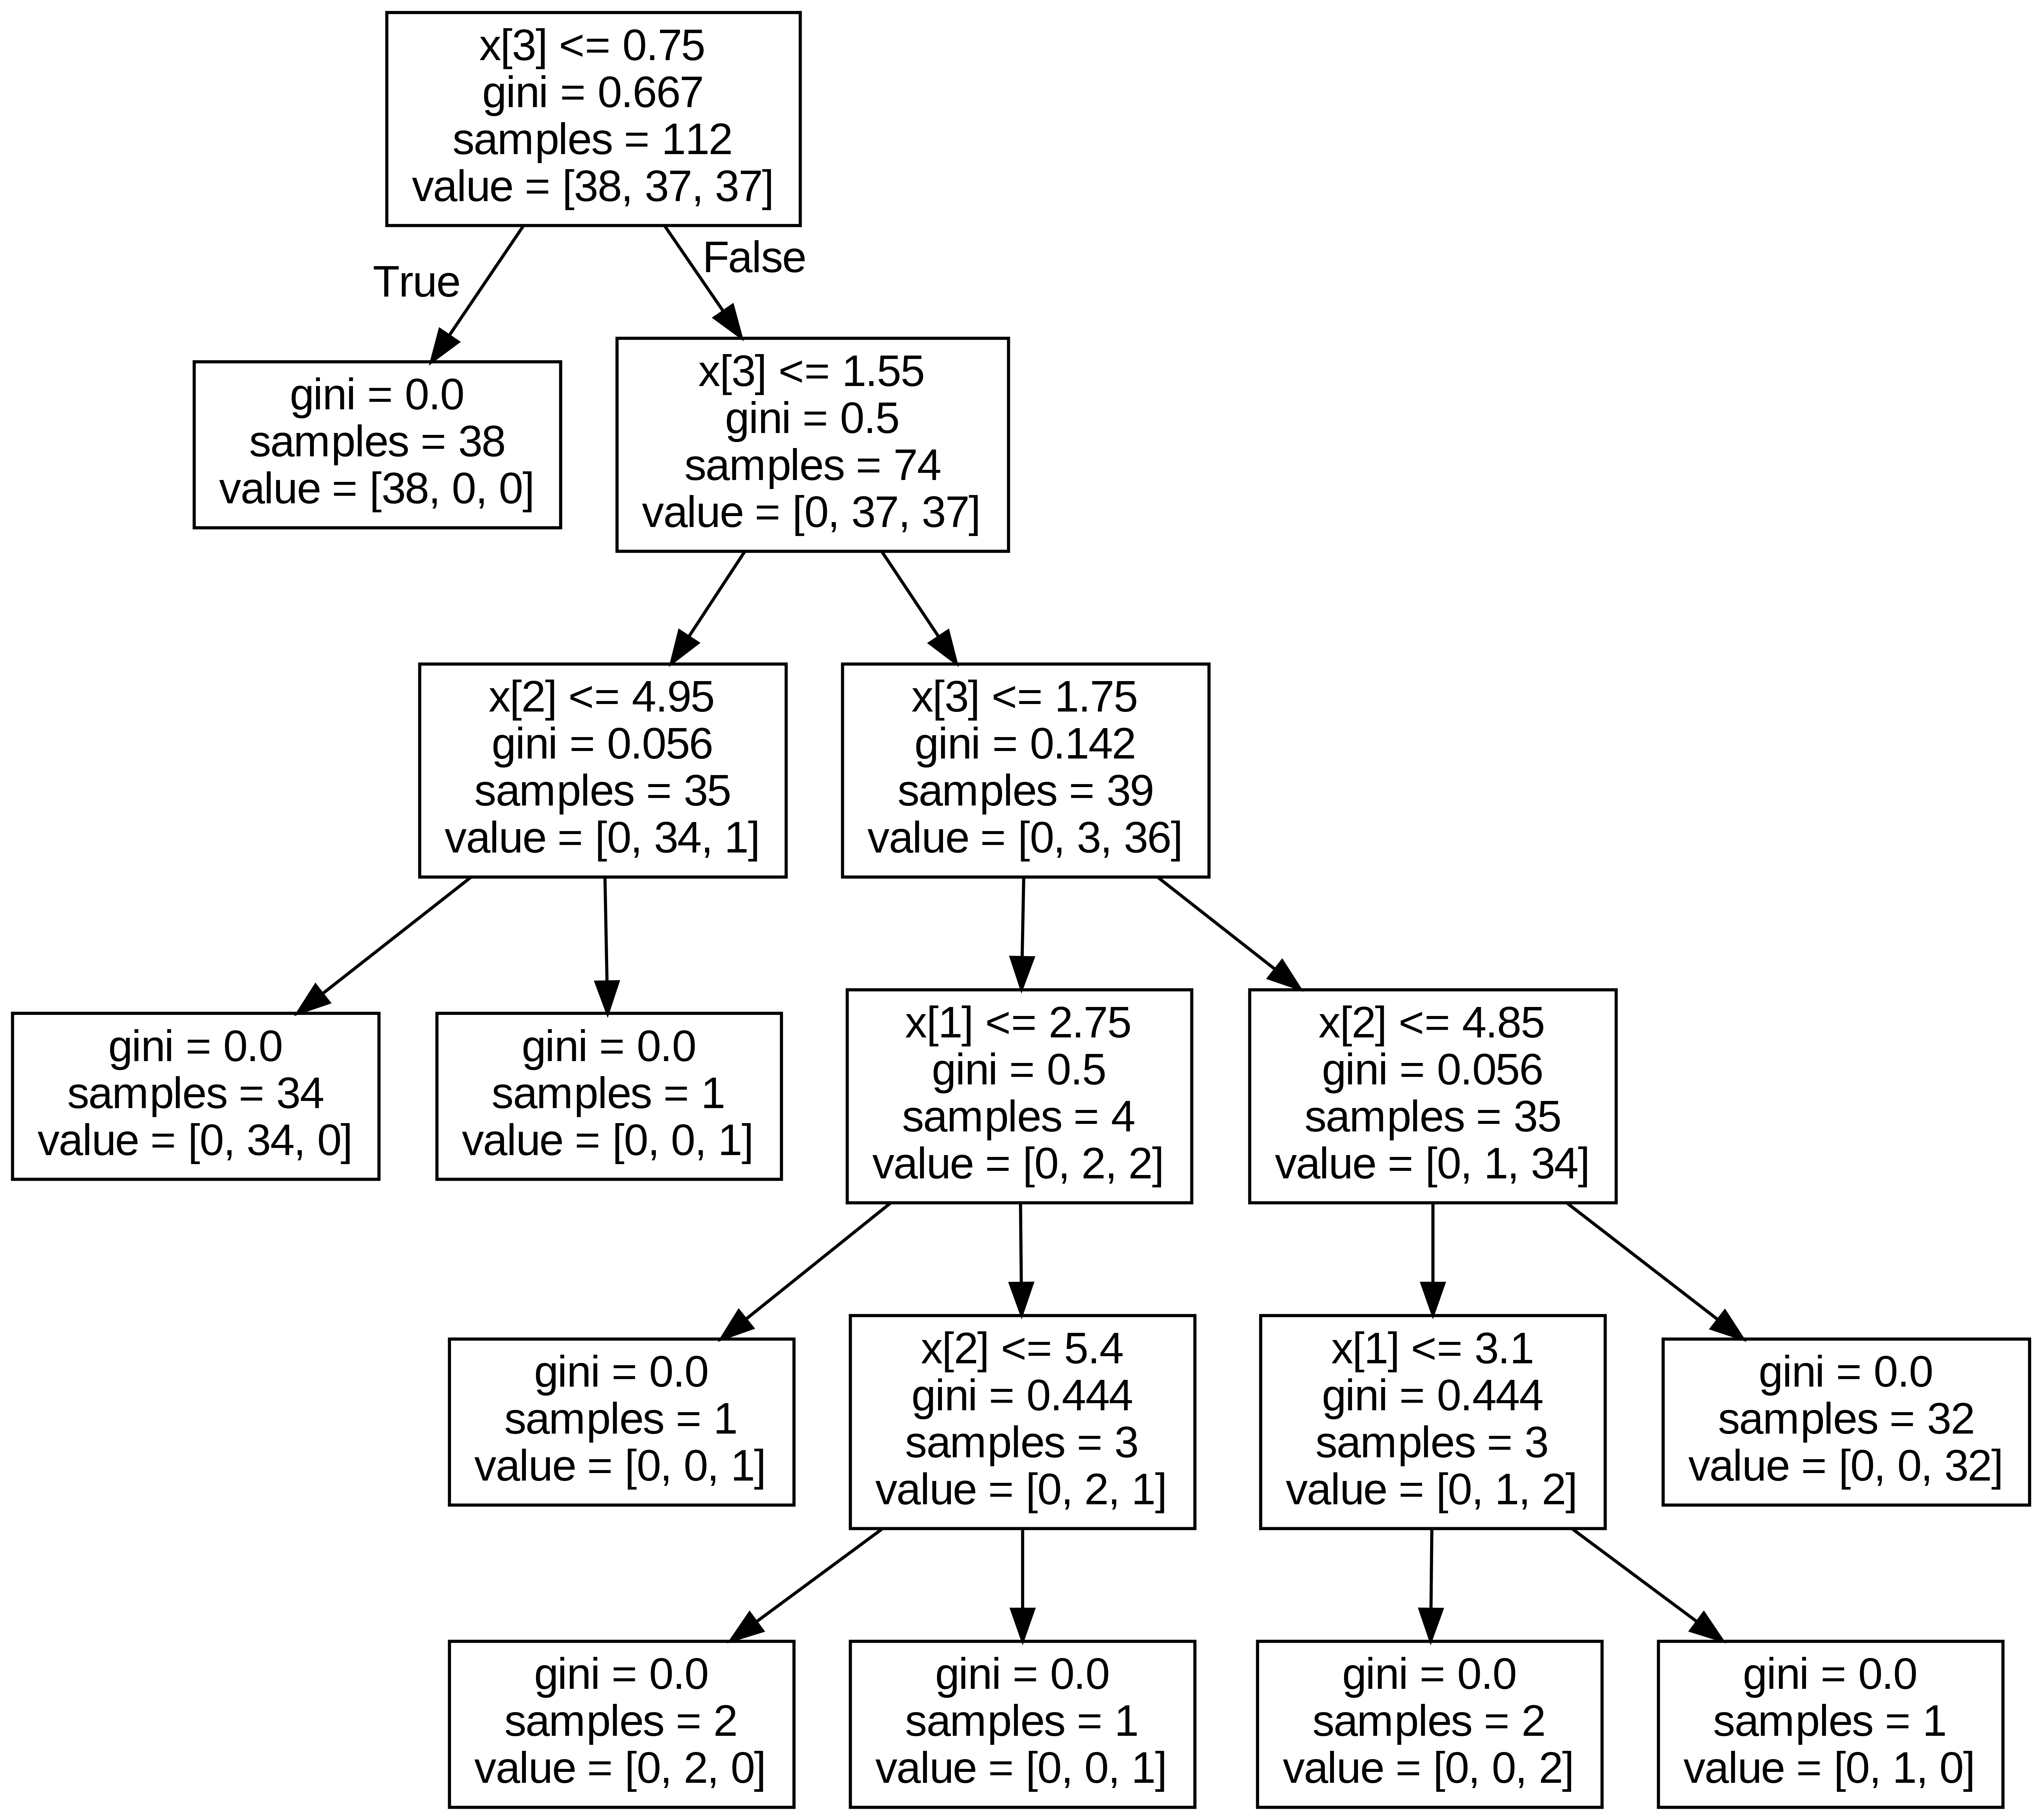

In [41]:
graph_tree(dtc)

* gini계수 : 불순도를 의미하며, 계수가 높을 수록 엔트로피가 크다는 의미로, 엔트로피가 크다는 의미는 클래스가 혼잡하게 섞여 있다는 뜻

In [42]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

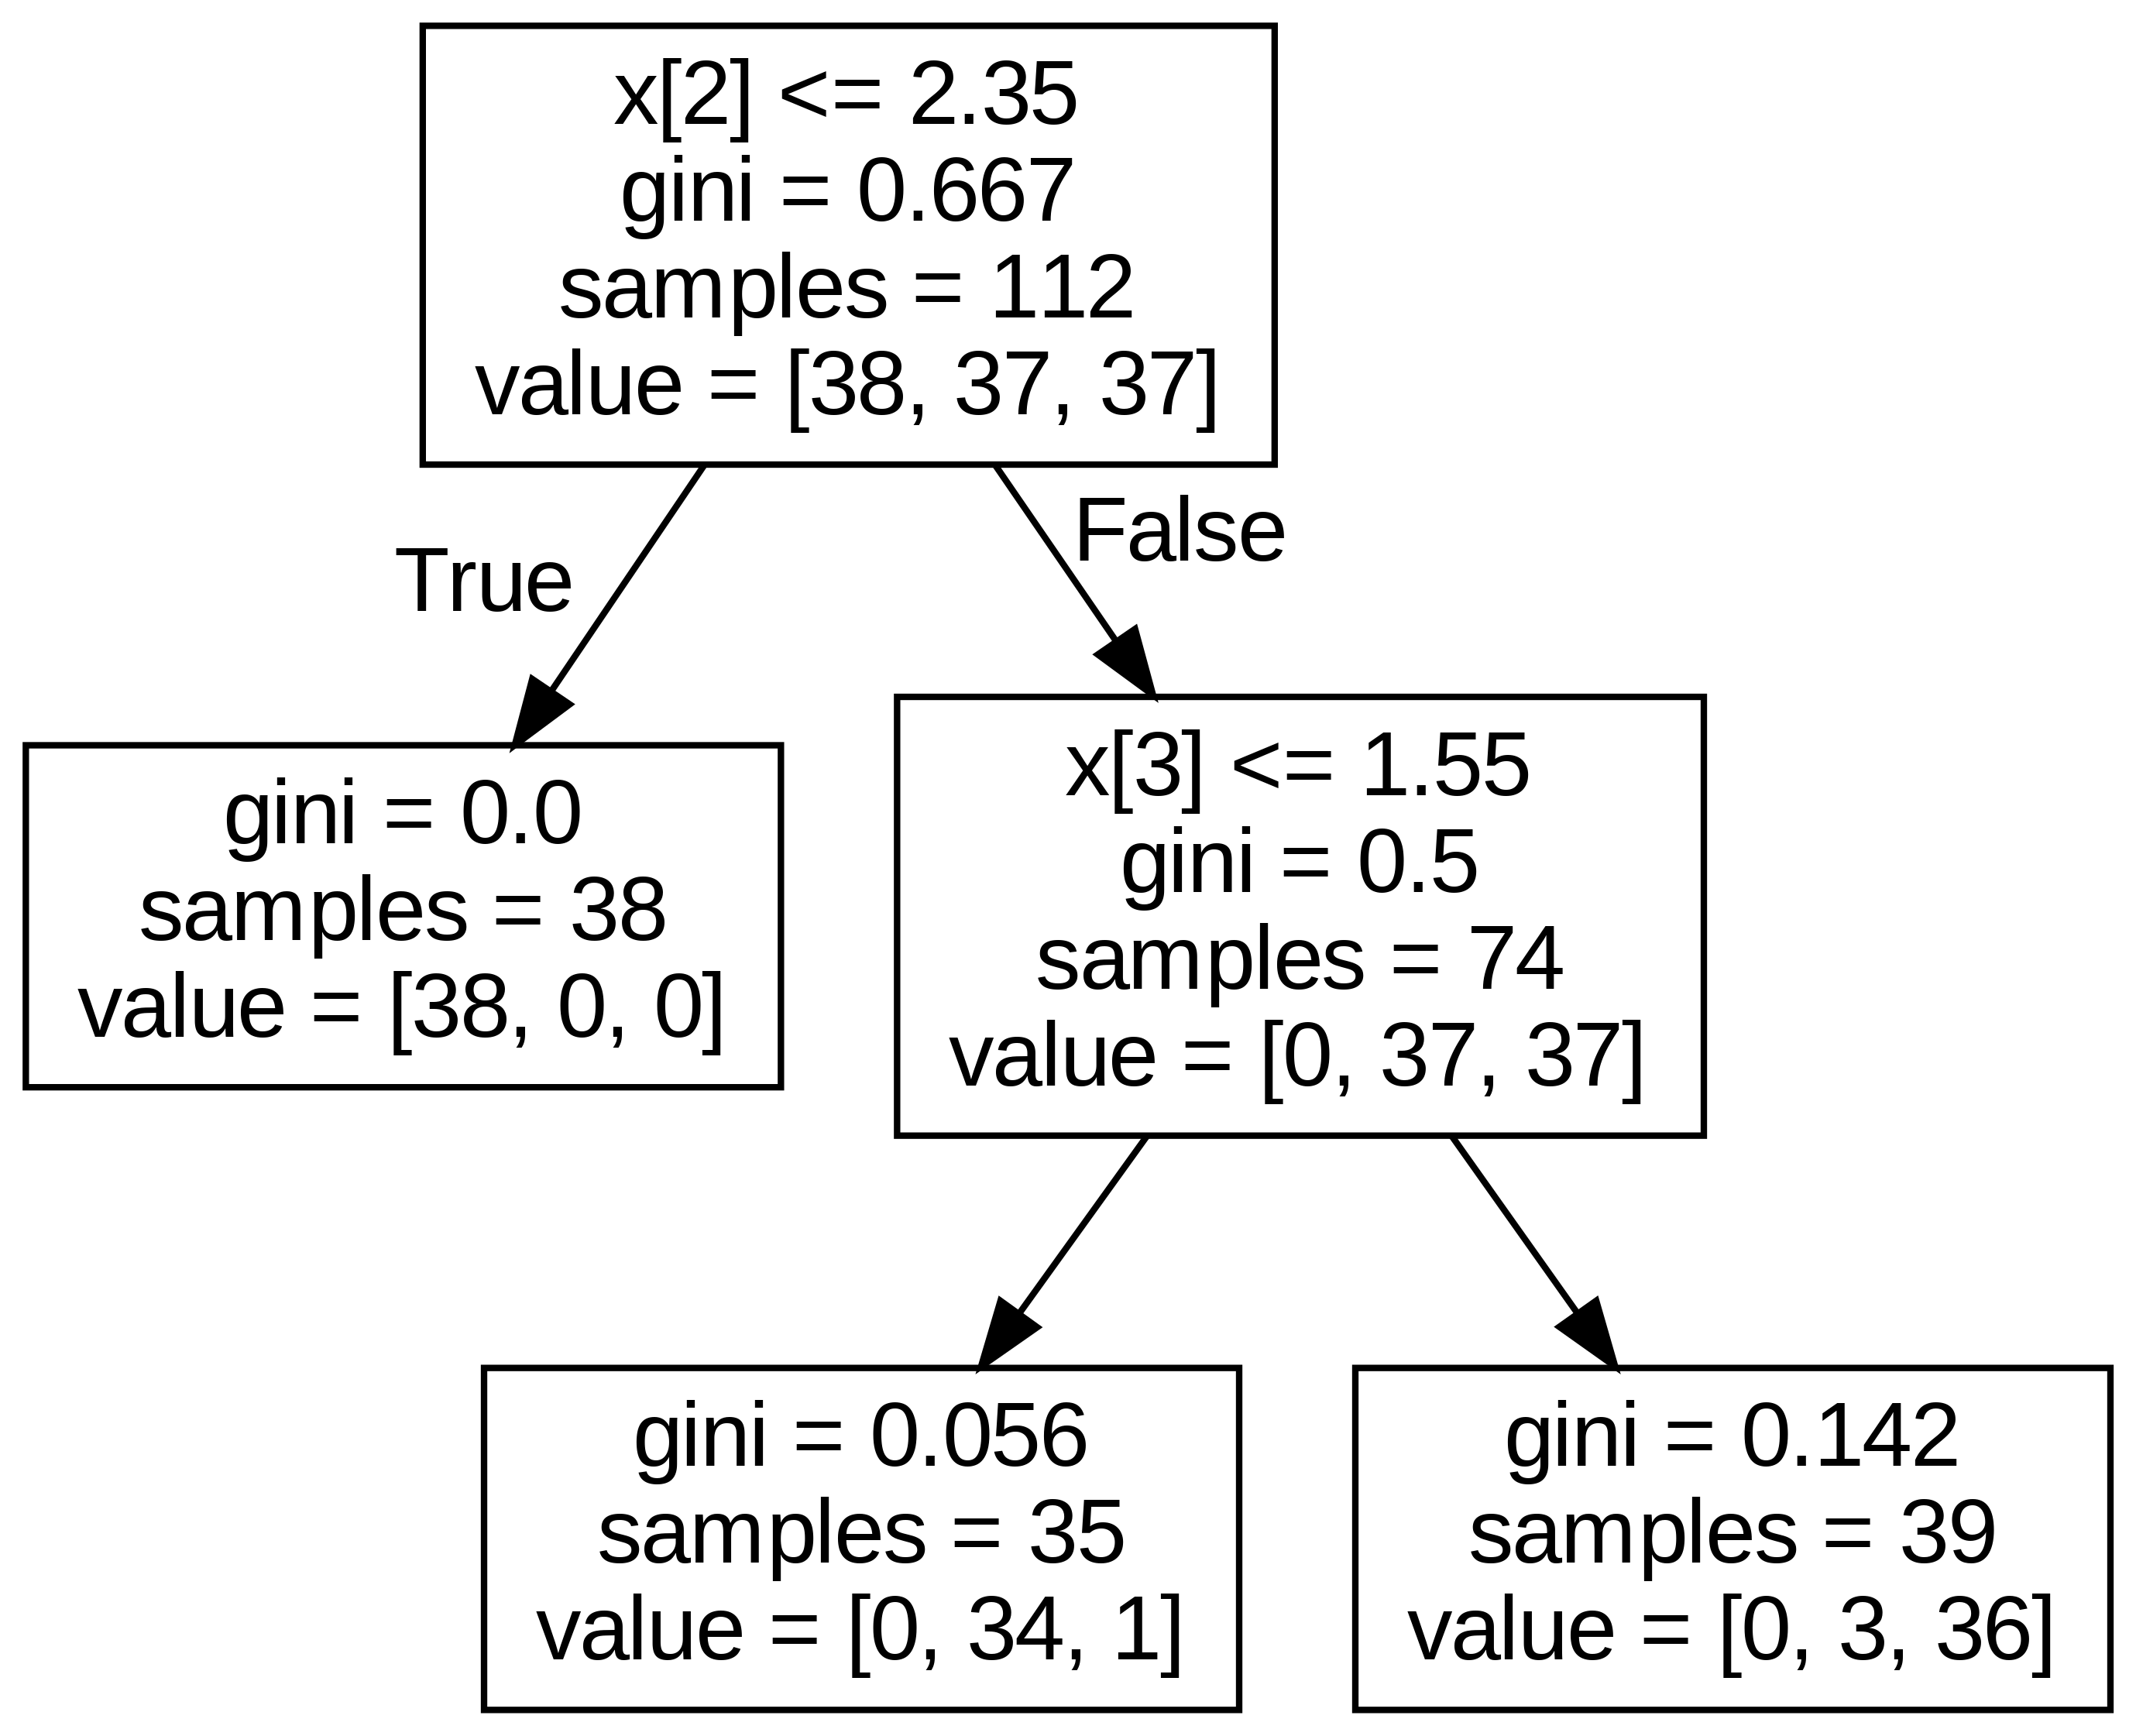

In [43]:
graph_tree(dtc)

# **7. 오차(Error)**

### **7-1. 정확도의 함정**

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

In [45]:
# 유방암 환자 데이터셋을 로드
cancer = load_breast_cancer()

In [46]:
# 요약정보
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [47]:
# data
data = cancer['data']
target = cancer['target']
feature_names = cancer['feature_names']

In [49]:
# 데이터 프레임을 생성
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [50]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [51]:
# target이 1인 경우 pos 저장 (양성종양)
# target이 0인 경우 neg 저장 (악성종양)
pos = df.loc[df['target']==1]
neg = df.loc[df['target']==0]

In [54]:
pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [55]:
neg

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [56]:
sample = pd.concat([pos, neg[:5]], sort=True)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample['target'], random_state=42)

<ipython-input-57-e712f063b742>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample['target'], random_state=42)


In [58]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
(pred == y_test).mean()

0.978021978021978

In [60]:
my_prediction = np.ones(shape=y_test.shape)

In [61]:
(my_prediction == y_test).mean()

0.989010989010989

> 정확도만 본다면 무조건 음성 환자로 예측하는 분류기가 성능이 좋음. 따라서 정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 이와 같은 오류에 빠질 수 있음

### **7-2. 오차 행렬 (confusion matrix)**

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_test, pred)

array([[ 1,  0],
       [ 2, 88]])

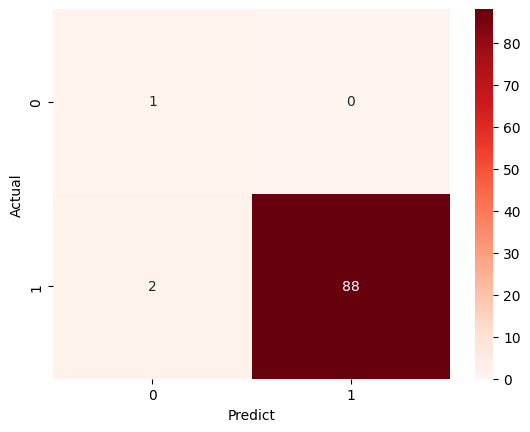

In [64]:
from matplotlib import pyplot as plt

sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

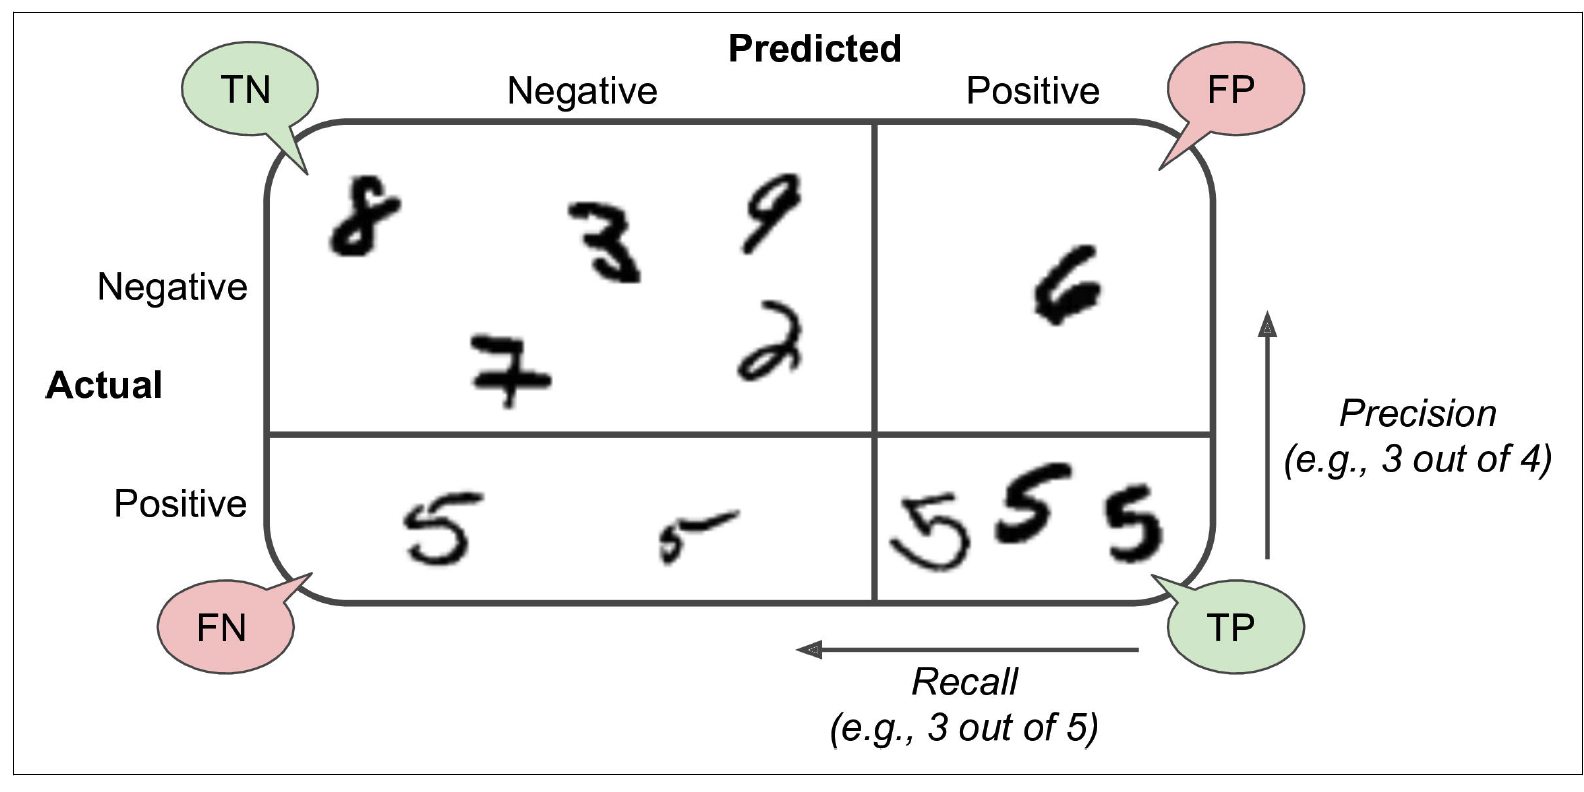

In [65]:
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png', width=500)

# **7-2. 정밀도(precision)**

양성 예측 정확도
```
TP / (TP + FP)
```

In [66]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, pred)

1.0

> 무조건 양성으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지는 않음

### **7-3. 재현율(recall)**

```
TP / (TP + FN)
```
* 정확하게 감지한 양성 샘플의 비율
* 민감도(sensitivity) 또는 True Positive Rate(TPR) 이라고도 부름

In [ ]:
recall_score(y_test, pred)

0.9777777777777777

In [ ]:
88/90

0.9777777777777777

### **7-4. f1 score**

* 정밀도와 재현율의 조화 평균을 나타내는 지표

In [ ]:
Image('https://miro.medium.com/max/918/1*jCu9fNZS0hSRHVJ2cBTegg.png')

<IPython.core.display.Image object>

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test, pred)

0.9887640449438202